In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def example_data():
    data = pd.read_csv("/Users/manmanzhang/Library/Mobile Documents/com~apple~CloudDocs/MyProject/InferenceSystem/src/I5_algorithm/data3.csv")
    a = (data.to_numpy()[:,1:]).astype(float)
    b = np.ones_like(a)
    X = np.where(np.isnan(a), 0, a * b)[:,:-2]
    Y = b[:,-2:-1]
    print(X.shape,Y.shape)
    return X,Y
x,y = example_data()

(746, 198) (746, 1)


In [3]:
xu=np.random.rand(50)*4*np.pi-2*np.pi

In [4]:
def f(x):
    return np.sin(x)+0.5*x
yu=f(xu)

# 1.numpy.polyfit( )

## 线性拟合

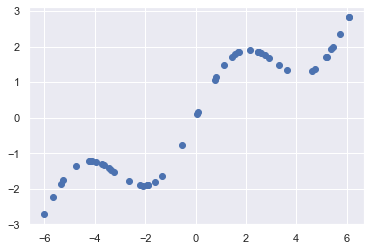

In [5]:
plt.scatter(xu,yu)

Text(0, 0.5, 'f(x)')

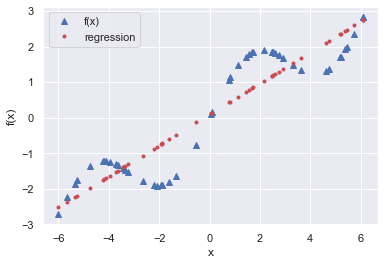

In [16]:
import numpy as np
reg = np.polyfit(xu,yu,deg=1)
ry = np.polyval(reg,xu)
plt.plot(xu,yu,'b^',label='f(x)')
plt.plot(xu,ry,'r.',label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')


## 多项式拟合 参数 deg>1

Text(0, 0.5, 'f(x)')

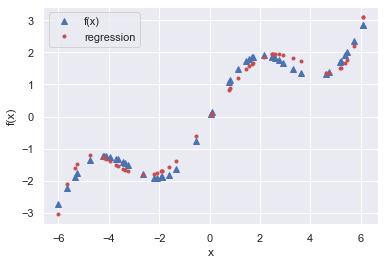

In [8]:
import numpy as np
reg = np.polyfit(xu,yu,deg=5)
ry = np.polyval(reg,xu)
plt.plot(xu,yu,'b^',label='f(x)')
plt.plot(xu,ry,'r.',label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

## 查看均方误差

In [8]:
mse=np.sum((f(xu)-ry)**2)/len(xu)
mse

0.04933454170570781

In [9]:
x = np.random.rand(1000).reshape(100,10)
y = np.random.rand(100)[:,None]
x.shape,y.shape

((100, 10), (100, 1))

# 2.scipy.stats.linregress()
https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit
#### 这是一个高度专业化的线性回归函数，可以在SciPy的统计模块中找到。然而因为它仅被#### 用来优化计算两组测量数据的最小二乘回归，所以其灵活性相当受限。因此，不能使用它#### 进行广义线性模型和多元回归拟合。但是，由于其特殊性，它是简单线性回归中最快速的#### 方法之一。除了拟合的系数和截距项之外，它还返回基本统计量，如R2系数和标准差

In [10]:
from scipy import stats
statsreg = stats.linregress(xu,yu)

In [11]:
statsreg

LinregressResult(slope=0.4328971499136346, intercept=-0.11711531572803986, rvalue=0.9278977061930579, pvalue=3.3339532538314507e-22, stderr=0.025106174361119397)

# 3.optimize.curve_fit( )
https://blog.csdn.net/jason_cuijiahui/article/details/87211889
#### 这与Polyfit方法是一致的，但本质上更具一般性。这个强大的函数来自
#### scipy.optimize模块，可以通过最小二乘最小化将任意的用户自定义函数拟合到数据集上。
#### 对于简单的线性回归来说，可以只写一个线性的mx + c函数并调用这个估计函数。不言而喻，
#### 它也适用于多元回归，并返回最小二乘度量最小的函数参数数组以及协方差矩阵。

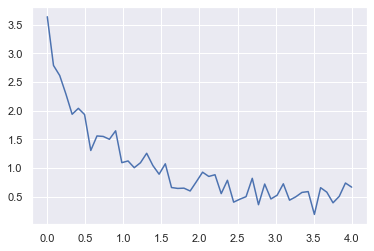

In [12]:
from scipy import optimize

# 定义目标函数
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# 这部分生成样本点，对函数值加上高斯噪声作为样本点
# [0, 4]共50个点
xdata = np.linspace(0, 4, 50)
# a=2.5, b=1.3, c=0.5
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(10086)
err_stdev = 0.2
# 生成均值为0，标准差为err_stdev为0.2的高斯噪声
y_noise = err_stdev * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.figure('拟合图')
plt.plot(xdata, ydata, 'b-', label='data')

(array([2.67723696, 1.43052196, 0.54537768]),
 array([[ 0.01242841,  0.00555071, -0.00050879],
        [ 0.00555071,  0.01524339,  0.00377389],
        [-0.00050879,  0.00377389,  0.00193364]]))

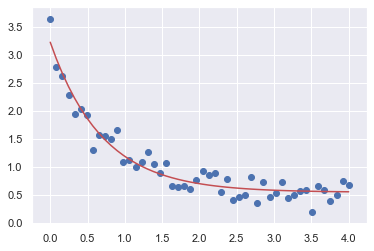

In [13]:
popt, pcov = optimize.curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.scatter(xdata, ydata, label='data')
popt,pcov

# numpy.linalg.lstsq()
#### 这是通过矩阵分解计算线性方程组的最小二乘解的基本方法。来自numpy包的简便线性代#### 数模块。在该方法中，通过计算欧几里德2-范数||b-ax||2最小化的向量x来求解等式#### ax = b。
#### 该方程可能有无数解、唯一解或无解。如果a是方阵且满秩，则x（四舍五入）是方程的“精确”解。
#### 你可以使用这个方法做一元或多元线性回归来得到计算的系数和残差。一个小诀窍是，在#### 调用函数之前必须在x数据后加一列1来计算截距项。这被证明是更快速地解决线性回归#### 问题的方法之一。

In [14]:
import numpy as np
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
A = np.vstack([x, np.ones(len(x))]).T
Am = np.mat(A)
ym = np.mat(y).T
print(np.linalg.lstsq(A, y)[0])
print(np.linalg.inv(Am.T * Am) * Am.T * ym)
print(np.linalg.pinv(Am) * ym)

[ 1.   -0.95]
[[ 1.  ]
 [-0.95]]
[[ 1.  ]
 [-0.95]]


In [15]:
from sklearn.linear_model import SGDRegressor
# 从sklearn.model导入数据分割器
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # 从sklearn.preprocessing导入数据标准化模块
# 分别初始化对特征和目标值的标准化器

X = np.random.rand(1000).reshape(100,10)
y = np.random.rand(100)[:,None]
ss_X = StandardScaler()
ss_y = StandardScaler()
# 随机采样25%的数据构建测试样本,其余作为训练样本
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.25)
# 分别对训练和测试数据的特征以及目标值进行标准化处理
x_train = ss_X.fit_transform(x_train)
x_test = ss_X.transform(x_test)


# 参数说明
http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.linear_model.SGDRegressor.html
loss：str，'squared_loss'，'huber'，'epsilon_insensitive'或'squared_epsilon_insensitive'

要使用的损失函数。默认为'squared_loss'，表示普通的最小二乘拟合。'huber'修改了'squared_loss'，通过将平方损失转换为线性损失超过ε距离，从而减少了对异常值校正的关注。'epsilon_insensitive'忽略小于epsilon的错误，并且超出此范围呈线性关系；这是SVR中使用的损失函数。'squared_epsilon_insensitive'是相同的，但超过ε容差后变为平方损耗。

In [16]:
from sklearn.linear_model import SGDRegressor
# 使用默认配置初始化线性回归器SGDRegressore
sgdr = SGDRegressor(max_iter=1000
,alpha=0.0000001
,epsilon=0.000000000000001
,fit_intercept=True
,l1_ratio=0.15
,loss='squared_loss')#0 <= l1_ratio <= 1的Elastic Net混合参数。l1_ratio = 0对应于L2惩罚，l1_ratio = 1到L1。默认值为0.15。
# 使用训练数据进行参数估计
sgdr.fit(x_train, y_train)
# 对测试数据进行回归预测
sgdr_y_predict = sgdr.predict(x_test)

In [17]:
sgdr_y_predict,sgdr.alpha

(array([0.49545153, 0.54403753, 0.42738637, 0.50891984, 0.44941291,
        0.28288966, 0.44809617, 0.37832647, 0.43990936, 0.44020192,
        0.48732721, 0.2654563 , 0.28150491, 0.40907274, 0.51439692,
        0.5244678 , 0.41221734, 0.40922816, 0.41521889, 0.54315681,
        0.52845623, 0.47836339, 0.4214144 , 0.46674648, 0.50571352]),
 1e-07)

In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# 对SGD模型评估
sgdr_score = sgdr.score(x_test, y_test)
print("SGD的默认评估值为：", sgdr_score)
sgdr_R_squared = r2_score(y_test, sgdr_y_predict)
print("SGD的R_squared值为：", sgdr_R_squared)
#sgdr_mse = mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(sgdr_y_predict))
#print("SGD的均方误差为:", sgdr_mse)
#sgdr_mae = mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(sgdr_y_predict))
#print("SGD的平均绝对误差为:", sgdr_mae)

SGD的默认评估值为： 0.014909937616276792
SGD的R_squared值为： 0.014909937616276792


## 方程解回归

In [19]:
def EquationRegression(X,Y,predict):
        '''
        回归方程
        :param X:
        :param Y:
        :param predict:
        :return:
        '''
        predict = np.array(predict)
        try:
            xm,xn = X.shape
            ym,yn = Y.shape
        except Exception:
            xm,xn = X.shape
            Y = Y[:,None]
        finally:
            newX = np.c_[np.ones(xm),X]
            fit = np.dot(np.dot(np.linalg.inv(np.dot(newX.T,newX)),newX.T),Y)
            predictX = np.c_[np.ones(predict.shape[0]),predict].dot(fit)
            return fit,predictX

In [20]:
EquationRegression(x_train,y_train,x_test)

(array([[ 4.85520986e-01],
        [ 4.25398019e-02],
        [-3.16620072e-02],
        [-4.41818451e-02],
        [ 1.72997270e-02],
        [-3.70826229e-02],
        [-2.40099205e-02],
        [ 1.21867187e-02],
        [-1.94980367e-02],
        [-5.15829251e-02],
        [ 2.68701245e-05]]),
 array([[0.52817774],
        [0.58580856],
        [0.4802982 ],
        [0.55866135],
        [0.46154174],
        [0.27637173],
        [0.46698022],
        [0.4038013 ],
        [0.47790167],
        [0.4923329 ],
        [0.53146892],
        [0.2647369 ],
        [0.28891748],
        [0.44792312],
        [0.54196026],
        [0.57245008],
        [0.43121027],
        [0.45704052],
        [0.45557085],
        [0.57839973],
        [0.60641609],
        [0.52447441],
        [0.46585664],
        [0.47763555],
        [0.54604768]]))